<a href="https://colab.research.google.com/github/manulthanura/AI-Computer-Vision/blob/main/Tutorial_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECS4300/ECS3300-Artificial Intelligence and Computer Vision
## Tutorial 02

### Intensity clamping
Intensity clamping, as implemented in the provided code, is a technique used to limit the pixel intensity values within a specified range in a grayscale image. The code sets pixel values below a defined lower threshold to zero and those above an upper threshold to 255, effectively clipping the intensity levels at both ends of the spectrum. This process can remove noise or enhance features within a certain intensity range, making it easier to focus on specific areas of interest in the image.

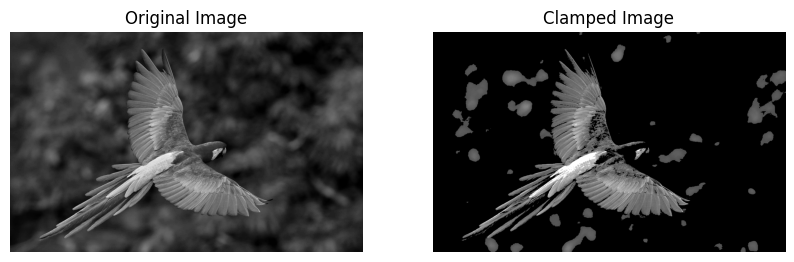

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def intensity_clamping(image_path, clamp_min=90, clamp_max=180):
    # Open the image
    with Image.open(image_path) as img:
        # Convert the image to grayscale
        grayscale_image = img.convert('L')
        image_array = np.array(grayscale_image)

        # Perform intensity clamping using nested for loops
        height, width = image_array.shape
        for i in range(height):
            for j in range(width):
                pixel = image_array[i, j]
                if pixel < clamp_min:
                    image_array[i, j] = 0
                elif pixel > clamp_max:
                    image_array[i, j] = 255
                # If the pixel is within the range, no changes are made

        clamped_image = Image.fromarray(image_array.astype('uint8'))

        return clamped_image, grayscale_image

def show_images(original_image, processed_image, processed_title="Processed Image"):
    # Set up the matplotlib figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show original image
    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')  # Hide axes ticks

    # Show processed image
    axs[1].imshow(processed_image, cmap='gray')
    axs[1].set_title(processed_title)
    axs[1].axis('off')  # Hide axes ticks

    plt.show()

# Example usage:
image_path = "/content/sample_data/images/1.jpg"
clamped_image, original_image = intensity_clamping(image_path, clamp_min=80, clamp_max=200)

# Show the original and clamped images
show_images(original_image, clamped_image, processed_title="Clamped Image")


### Intensity windowing
Intensity windowing, demonstrated in the provided code, is an image processing technique used to enhance the contrast of an image. The code applies this technique to a grayscale image by setting all pixel intensities below a specified minimum to zero and all intensities above a specified maximum to 255. Intensities within the range are left unchanged. This method emphasizes the contrast between features in an image by darkening the shadows and brightening the highlights, which can help in better visualizing the details within the image.

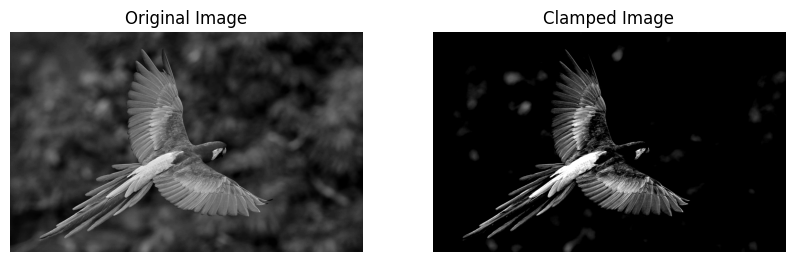

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def intensity_windowing(image_path, clamp_min=90, clamp_max=180):
    # Open the image
    with Image.open(image_path) as img:
        # Convert the image to grayscale
        grayscale_image = img.convert('L')
        image_array = np.array(grayscale_image)

        # Perform intensity clamping using nested for loops
        height, width = image_array.shape
        for i in range(height):
            for j in range(width):
                pixel = image_array[i, j]
                if pixel < clamp_min:
                    image_array[i, j] = 0
                elif clamp_min <= pixel <= clamp_max:
                    image_array[i, j] = (255* ((image_array[i, j] - clamp_min)/(clamp_max - clamp_min))).astype('uint8')
                elif pixel > clamp_max:
                    image_array[i, j] = 255
                # If the pixel is within the range, no changes are made

        clamped_image = Image.fromarray(image_array.astype('uint8'))

        return clamped_image, grayscale_image

def show_images(original_image, processed_image, processed_title="Processed Image"):
    # Set up the matplotlib figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show original image
    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')  # Hide axes ticks

    # Show processed image
    axs[1].imshow(processed_image, cmap='gray')
    axs[1].set_title(processed_title)
    axs[1].axis('off')  # Hide axes ticks

    plt.show()

# Example usage:
image_path = "/content/sample_data/images/1.jpg"
clamped_image, original_image = intensity_windowing(image_path, clamp_min=80, clamp_max=200)

# Show the original and clamped images
show_images(original_image, clamped_image, processed_title="Clamped Image")


### Image brightness
The provided code snippet defines a function to calculate the average brightness of an image. It works by first converting the image to grayscale, which simplifies the image data to a single luminance channel. The function then iterates over each pixel in the image using nested for loops, summing up the grayscale intensity values. The total sum of these values is then divided by the number of pixels in the image to find the average brightness.

This average brightness value is a single number representing the overall luminance of the image. A higher average brightness indicates a generally lighter image, while a lower value suggests a darker image.

In [ ]:
from PIL import Image

def calculate_brightness(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Convert the image to grayscale
        grayscale_image = img.convert('L')

        # Get the dimensions of the image
        width, height = grayscale_image.size

        # Initialize the sum of all pixel values
        total_brightness = 0

        # Nested for loops to go through each pixel
        for i in range(width):
            for j in range(height):
                # Get the pixel value at the current position
                pixel_brightness = grayscale_image.getpixel((i, j))
                # Add the pixel value to the total brightness
                total_brightness += pixel_brightness

        # Calculate the average brightness
        average_brightness = total_brightness / (width * height)

        return average_brightness

# Example usage:
image_path = "/content/sample_data/images/1.jpg"
brightness = calculate_brightness(image_path)
print(f"The average brightness of the image is: {brightness}")


The average brightness of the image is: 58.059313775510205


The first code snippet manually calculates the average brightness of an image by converting it to grayscale, iterating over each pixel with nested for loops, summing their values, and then dividing by the total number of pixels to get the average.

The second snippet simplifies this process by using the ImageStat module from the Python Imaging Library (PIL). Instead of manually iterating over each pixel, it utilizes the Stat class to compute image statistics. The mean attribute of the ImageStat.Stat object directly provides the average brightness (mean luminance) of the grayscale image. This method is more concise and efficient, as it leverages the optimized internal implementations of the PIL library to calculate the mean, rather than using Python loops.

In [ ]:
from PIL import Image, ImageStat

def calculate_brightness(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Convert the image to grayscale
        grayscale_image = img.convert('L')

        # Calculate the average brightness
        stat = ImageStat.Stat(grayscale_image)
        # The mean of a grayscale image is its average brightness
        brightness = stat.mean[0]

        return brightness

# Example usage:
image_path = "/content/sample_data/images/1.jpg"
brightness = calculate_brightness(image_path)
print(f"The average brightness of the image is: {brightness}")

The average brightness of the image is: 58.059313775510205


### Compute Histogram
The code calculates a grayscale image's histogram by iterating over each pixel, tallying the occurrences of each intensity level, and then plots this distribution using matplotlib. It manually constructs the histogram using nested loops, which is a straightforward but less efficient method compared to library-optimized functions.

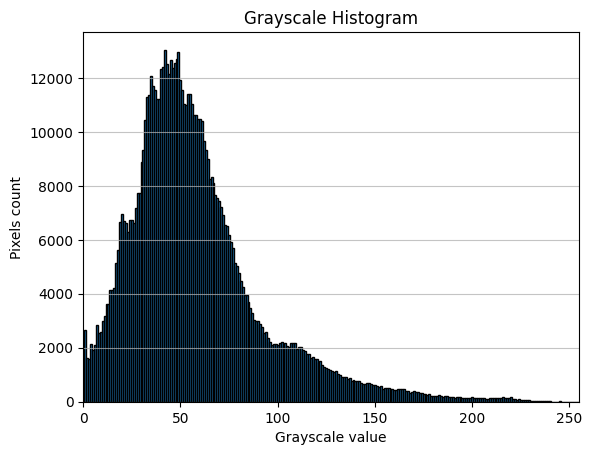

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_histogram_with_loops(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Convert the image to grayscale
        grayscale_image = img.convert('L')

        # Get the dimensions of the image
        width, height = grayscale_image.size

        # Initialize a list to count the occurrence of each pixel intensity
        histogram = [0] * 256 # Python creates a list of 256 elements, where each element is initialized to 0.

        # Nested for loops to iterate over each pixel
        for i in range(width):
            for j in range(height):
                # Get the pixel value at the current position
                pixel_value = grayscale_image.getpixel((i, j))
                # Increment the histogram count for the pixel value
                histogram[pixel_value] += 1

        return histogram

def plot_histogram(histogram):
    # Configure and show the histogram plot
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Grayscale value")
    plt.ylabel("Pixels count")

    plt.bar(range(256), histogram, width=1, edgecolor='black')

    plt.xlim(0, 255)
    plt.grid(axis='y', alpha=0.75)

    plt.show()

# Example usage:
image_path = "/content/sample_data/images/1.jpg"
histogram = compute_histogram_with_loops(image_path)
plot_histogram(histogram)


This code defines a function to compute and visualize the histogram of a grayscale image using NumPy and Matplotlib. It opens an image, converts it to grayscale, and then flattens the grayscale data into a 1D NumPy array. Using NumPy's histogram function, it calculates the frequency of each grayscale value across the image. The histogram is then plotted as a bar chart, with grayscale values on the x-axis and pixel count on the y-axis, providing a visual representation of the intensity distribution within the image. The use of NumPy for histogram calculation is more efficient than manual iteration, making this method suitable for processing large images or performing batch analyses.

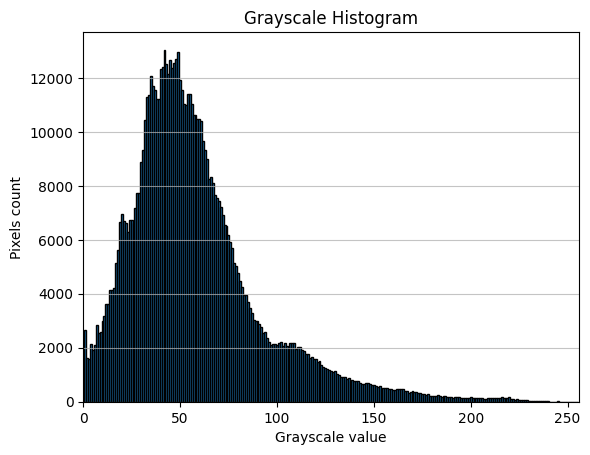

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def compute_and_visualize_histogram(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Convert the image to grayscale
        grayscale_image = img.convert('L')

        # Convert the grayscale image to a numpy array
        pixel_values = np.array(grayscale_image).flatten()

        # Compute the histogram
        histogram, bin_edges = np.histogram(pixel_values, bins=range(257))

        # Configure and show the histogram plot
        plt.figure()
        plt.title("Grayscale Histogram")
        plt.xlabel("Grayscale value")
        plt.ylabel("Pixels count")

        plt.bar(bin_edges[:-1], histogram, width=1, edgecolor='black')

        plt.xlim(min(bin_edges), max(bin_edges))
        plt.grid(axis='y', alpha=0.75)

        plt.show()

# Example usage:
image_path = "/content/sample_data/images/1.jpg"
compute_and_visualize_histogram(image_path)


### Compute Color Image Histogram
The code computes histograms for each RGB color channel of an image by iterating over each pixel, tallying the frequency of intensity levels for red, green, and blue separately. It then plots these histograms side by side, using colors corresponding to each channel, providing a visual analysis tool for understanding the color composition and balance of the image.

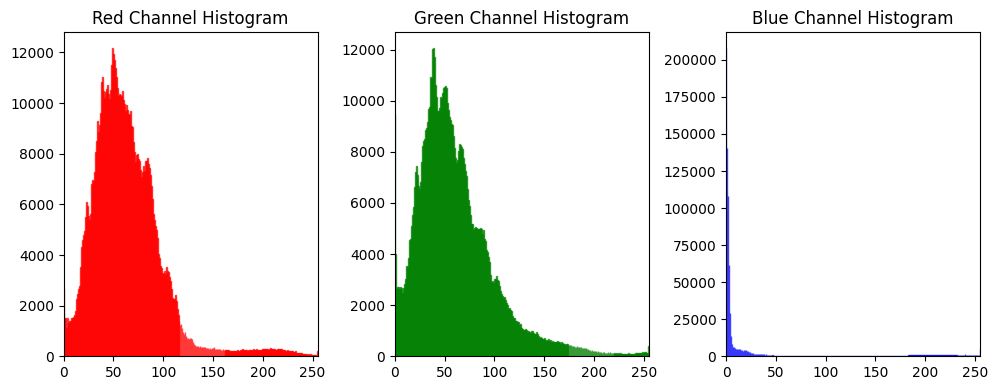

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_color_histogram(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Ensure the image is in RGB mode
        rgb_image = img.convert('RGB')

        # Initialize a list to count the occurrence of each pixel intensity for each color channel
        histogram_r = [0] * 256
        histogram_g = [0] * 256
        histogram_b = [0] * 256

        # Get the dimensions of the image
        width, height = rgb_image.size

        # Nested for loops to iterate over each pixel
        for i in range(width):
            for j in range(height):
                # Get the RGB pixel value at the current position
                r, g, b = rgb_image.getpixel((i, j))
                # Increment the histogram count for each color channel
                histogram_r[r] += 1
                histogram_g[g] += 1
                histogram_b[b] += 1

        return histogram_r, histogram_g, histogram_b

def plot_color_histogram(histogram_r, histogram_g, histogram_b):
    # Plot the histograms for each color channel
    plt.figure(figsize=(10, 4))

    # Red channel
    plt.subplot(1, 3, 1)
    plt.bar(range(256), histogram_r, color='red', edgecolor='red', alpha=0.7)
    plt.title("Red Channel Histogram")
    plt.xlim([0, 255])

    # Green channel
    plt.subplot(1, 3, 2)
    plt.bar(range(256), histogram_g, color='green', edgecolor='green', alpha=0.7)
    plt.title("Green Channel Histogram")
    plt.xlim([0, 255])

    # Blue channel
    plt.subplot(1, 3, 3)
    plt.bar(range(256), histogram_b, color='blue', edgecolor='blue', alpha=0.7)
    plt.title("Blue Channel Histogram")
    plt.xlim([0, 255])

    plt.tight_layout()
    plt.show()

# Example usage:
image_path = "/content/sample_data/images/1.jpg"
histogram_r, histogram_g, histogram_b = compute_color_histogram(image_path)
plot_color_histogram(histogram_r, histogram_g, histogram_b)


### Histogram Binning
The provided code defines a method for computing and visualizing a grayscale image's histogram with a specified number of bins, a process known as histogram binning. It opens an image, converts it to grayscale, and then calculates the histogram by grouping pixel intensities into fewer bins than the standard 256 levels. This is done by dividing the range of intensities (0-255) by the number of bins and assigning each pixel to the appropriate bin based on its intensity.

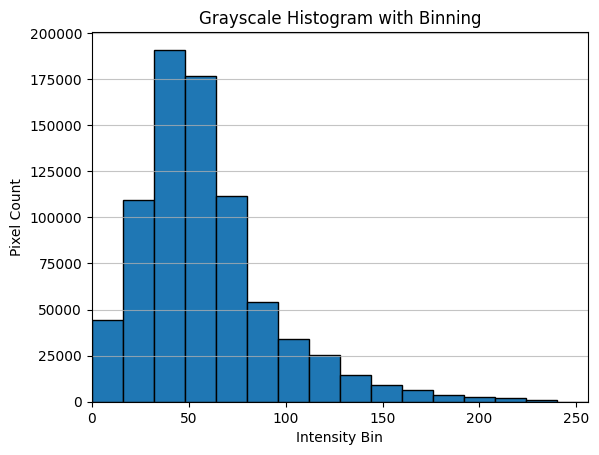

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_histogram_with_binning(image_path, num_bins):
    # Open the image file
    with Image.open(image_path) as img:
        # Convert the image to grayscale
        grayscale_image = img.convert('L')

        # Get the dimensions of the image
        width, height = grayscale_image.size

        # Initialize a list to count the occurrence of each pixel intensity
        histogram = [0] * num_bins

        # Calculate the bin width
        bin_width = 256 // num_bins
        if 256 % num_bins != 0:
            # Adjust bin_width if 256 is not evenly divisible by num_bins
            bin_width += 1

        # Nested for loops to iterate over each pixel
        for i in range(width):
            for j in range(height):
                # Get the pixel value at the current position
                pixel_value = grayscale_image.getpixel((i, j))
                # Find the appropriate bin for the pixel value
                bin_index = min(pixel_value // bin_width, num_bins - 1)  # Ensure the index is within range
                # Increment the histogram count for the bin
                histogram[bin_index] += 1

        return histogram

def plot_histogram_with_binning(histogram, num_bins):
    # Configure and show the histogram plot
    plt.figure()
    plt.title("Grayscale Histogram with Binning")
    plt.xlabel("Intensity Bin")
    plt.ylabel("Pixel Count")

    # Calculate the width of each bar and the bin edges
    bin_width = 256 // num_bins
    if 256 % num_bins != 0:
        # Adjust bin_width if 256 is not evenly divisible by num_bins
        bin_width += 1
    bin_edges = [i * bin_width for i in range(num_bins + 1)]

    plt.bar(bin_edges[:-1], histogram, width=bin_width, edgecolor='black', align='edge')

    # Set the x-axis to show the range from 0 to the maximum bin edge
    plt.xlim(0, bin_edges[-2] + bin_width)
    plt.grid(axis='y', alpha=0.75)

    plt.show()

# Example usage:
image_path = "/content/sample_data/images/1.jpg"
num_bins = 16  # You can change the number of bins here
histogram = compute_histogram_with_binning(image_path, num_bins)
plot_histogram_with_binning(histogram, num_bins)


### Cumulative Histogram
The provided code computes and plots the histogram and cumulative distribution function (CDF) for a grayscale image. It reads the image, converts it to grayscale, calculates the histogram by counting pixel intensities, and then calculates the CDF by cumulatively summing the histogram values.

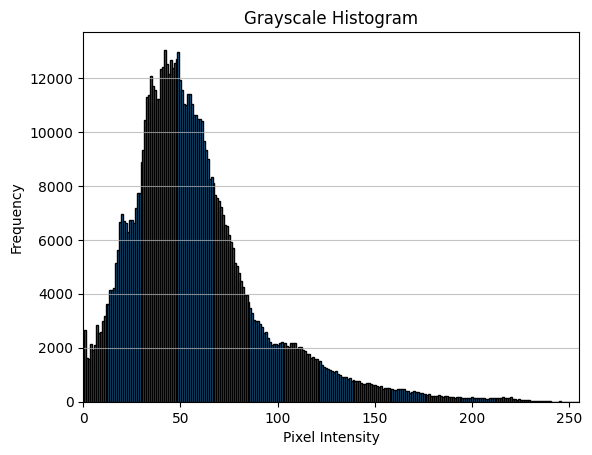

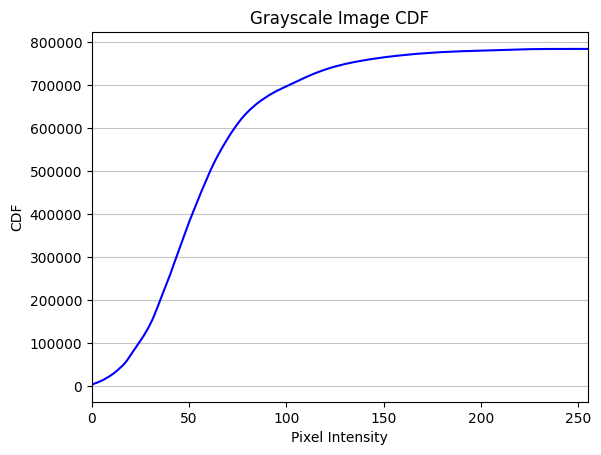

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_histogram_and_cdf(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Convert the image to grayscale
        grayscale_image = img.convert('L')

        # Get the dimensions of the image
        width, height = grayscale_image.size

        # Initialize a list to count the occurrence of each pixel intensity
        histogram = [0] * 256

        # Nested for loops to iterate over each pixel
        for i in range(width):
            for j in range(height):
                # Get the pixel value at the current position
                pixel_value = grayscale_image.getpixel((i, j))
                # Increment the histogram count for the pixel value
                histogram[pixel_value] += 1

        # Compute the CDF
        cdf = [sum(histogram[:i+1]) for i in range(len(histogram))]
        return histogram, cdf

def plot_histogram(histogram):
    # Configure and show the histogram plot
    plt.figure()
    plt.title("Grayscale Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.bar(range(len(histogram)), histogram, width=1, edgecolor='black')
    plt.xlim(0, 255)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

def plot_cdf(cdf):
    # Configure and show the CDF plot
    plt.figure()
    plt.title("Grayscale Image CDF")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("CDF")
    plt.plot(range(len(cdf)), cdf, color='blue')
    plt.xlim(0, 255)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

# Example usage:
image_path = "/content/sample_data/images/1.jpg"
histogram, cdf = compute_histogram_and_cdf(image_path)
plot_histogram(histogram)
plot_cdf(cdf)

### Histogram Equalization
The provided code performs histogram equalization on a grayscale image to improve its contrast. It calculates the image's histogram and cumulative distribution function (CDF), applies equalization, and then displays the original and equalized images along with their histograms and CDFs for comparison. The process enhances image contrast by redistributing pixel intensities more evenly across the histogram.

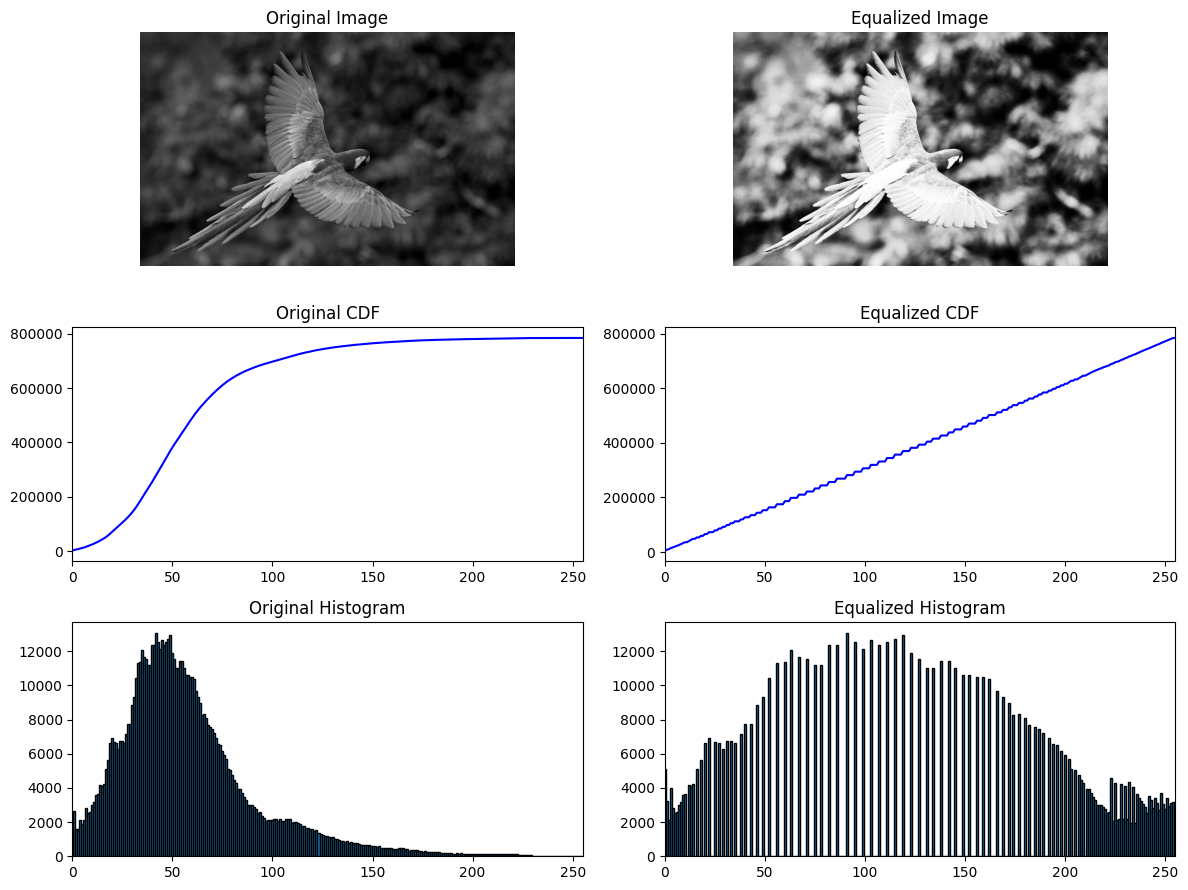

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def compute_histogram(image):
    width, height = image.size
    histogram = [0] * 256
    for x in range(width):
        for y in range(height):
            pixel_value = image.getpixel((x, y))
            histogram[pixel_value] += 1
    return histogram

def compute_cdf(histogram):
    cdf = [0] * len(histogram)
    cum_sum = 0
    for i, val in enumerate(histogram):
        cum_sum += val
        cdf[i] = cum_sum
    return cdf

def histogram_equalization(image):
    histogram = compute_histogram(image)
    cdf = compute_cdf(histogram)

    # Normalize the CDF
    cdf_min = min([x for x in cdf if x > 0])  # ignore zero values which can skew the result
    cdf_normalized = [(x - cdf_min) / (cdf[-1] - cdf_min) for x in cdf]

    # Create the equalization map (lookup table)
    equalization_map = [int(x * 255) for x in cdf_normalized]

    # Apply the equalization mapping to the pixels
    width, height = image.size
    equalized_image = Image.new('L', (width, height))
    for x in range(width):
        for y in range(height):
            pixel_value = image.getpixel((x, y))
            equalized_image.putpixel((x, y), equalization_map[pixel_value])

    return equalized_image, histogram, compute_histogram(equalized_image)

def plot_images_cdfs_histograms(original_image, equalized_image, original_histogram, equalized_histogram):
    fig, axs = plt.subplots(3, 2, figsize=(12, 9))

    # Display original image
    axs[0, 0].imshow(original_image, cmap='gray')
    axs[0, 0].set_title('Original Image')
    axs[0, 0].axis('off')

    # Display equalized image
    axs[0, 1].imshow(equalized_image, cmap='gray')
    axs[0, 1].set_title('Equalized Image')
    axs[0, 1].axis('off')

    # Plot original CDF
    original_cdf = compute_cdf(original_histogram)
    axs[1, 0].plot(original_cdf, color='blue')
    axs[1, 0].set_title('Original CDF')
    axs[1, 0].set_xlim([0, 255])

    # Plot equalized CDF
    equalized_cdf = compute_cdf(equalized_histogram)
    axs[1, 1].plot(equalized_cdf, color='blue')
    axs[1, 1].set_title('Equalized CDF')
    axs[1, 1].set_xlim([0, 255])

    # Plot original histogram
    axs[2, 0].bar(range(len(original_histogram)), original_histogram, width=1, edgecolor='black')
    axs[2, 0].set_title('Original Histogram')
    axs[2, 0].set_xlim([0, 255])

    # Plot equalized histogram
    axs[2, 1].bar(range(len(equalized_histogram)), equalized_histogram, width=1, edgecolor='black')
    axs[2, 1].set_title('Equalized Histogram')
    axs[2, 1].set_xlim([0, 255])

    plt.tight_layout()
    plt.show()

# Example usage:
image_path = "/content/sample_data/images/1.jpg"
original_image = Image.open(image_path).convert('L')

# Perform histogram equalization
equalized_image, original_histogram, equalized_histogram = histogram_equalization(original_image)

# Plot the images, CDFs, and histograms
plot_images_cdfs_histograms(original_image, equalized_image, original_histogram, equalized_histogram)
